#### Dependencies

In [885]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


#### Data Preparation

In [886]:

# Load csv file (sumber: https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success)
dtf = pd.read_csv("data.csv")

# white space to underscore
dtf.columns = dtf.columns.str.replace(' ', '_')

# Data cleaning
dtf = dtf.dropna()
dtf = dtf.drop_duplicates()
dtf = dtf[dtf["Target"] != "Enrolled"]
dtf['isDropout'] = (dtf['Target'] == 'Dropout')
dtf = dtf.drop(["Target"], axis=1)

dtf = dtf.drop(['Educational_special_needs',
                'Nacionality',
                'International',
                'Unemployment_rate',
                "Father's_qualification",
                "Inflation_rate",
                "Curricular_units_1st_sem_(credited)",
                "Curricular_units_2nd_sem_(credited)",
                "GDP",
                "Previous_qualification",
                "Curricular_units_1st_sem_(without_evaluations)",
                "Mother's_qualification",
                "Application_order",
                "Previous_qualification_(grade)",
                "Curricular_units_2nd_sem_(without_evaluations)",
                "Daytime/evening_attendance",
                "Curricular_units_1st_sem_(enrolled)",
                "Curricular_units_2nd_sem_(enrolled)",
                ],
                axis=1)

print(dtf.head())

   Marital_status  Application_mode  Course  Mother's_occupation  \
0               1                17     171                    5   
1               1                15    9254                    3   
2               1                 1    9070                    9   
3               1                17    9773                    5   
4               2                39    8014                    9   

   Father's_occupation  Admission_grade  Displaced  Debtor  \
0                    9            127.3          1       0   
1                    3            142.5          1       0   
2                    9            124.8          1       0   
3                    3            119.6          1       0   
4                    9            141.5          0       0   

   Tuition_fees_up_to_date  Gender  Scholarship_holder  Age_at_enrollment  \
0                        1       1                   0                 20   
1                        0       1                   0          

In [887]:
corr_matrix = dtf.corr()
corr_matrix = corr_matrix.abs()
sorted = corr_matrix.sort_values(by='isDropout')
sorted[['isDropout']]

,isDropout
Mother's_occupation,0.000772
Father's_occupation,0.005066
Course,0.038135
Curricular_units_1st_sem_(evaluations),0.059786
Marital_status,0.100479
Curricular_units_2nd_sem_(evaluations),0.119239
Displaced,0.126113
Admission_grade,0.128058
Application_mode,0.244507
Gender,0.251955


#### Pemisahan Data Training dan Testing

In [888]:
features = dtf.drop(['isDropout'], axis=1)
targets = dtf['isDropout'].values

# Membagi dataset menjadi data training dan data testing, dataset dibagi secara acak dengan rasio 80% data training dan 20% data test
X_train, X_test, y_train, y_test = train_test_split(features, targets, random_state=229)

print(f"Jumlah total data : {dtf.shape[0]}")
print(dtf.head())

Jumlah total data : 3630
   Marital_status  Application_mode  Course  Mother's_occupation  \
0               1                17     171                    5   
1               1                15    9254                    3   
2               1                 1    9070                    9   
3               1                17    9773                    5   
4               2                39    8014                    9   

   Father's_occupation  Admission_grade  Displaced  Debtor  \
0                    9            127.3          1       0   
1                    3            142.5          1       0   
2                    9            124.8          1       0   
3                    3            119.6          1       0   
4                    9            141.5          0       0   

   Tuition_fees_up_to_date  Gender  Scholarship_holder  Age_at_enrollment  \
0                        1       1                   0                 20   
1                        0       1     

#### Pelatihan Model dengan Training Data

In [889]:
# Pelatihan model dengan data training
print("Initializing...")
model = LogisticRegression(max_iter=3200)
model.fit(X_train, y_train)
print("Done!")

Initializing...
Done!


#### Evaluasi

Accuracy:  0.9008810572687225
Precision:  0.9140127388535032
Recall:  0.82
F1:  0.8644578313253012


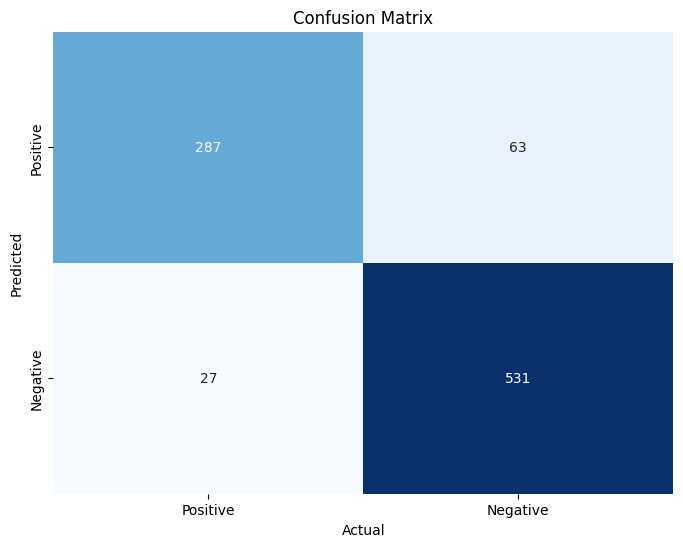

In [890]:
# Membuat prediksi dengan data testing
y_pred = model.predict(X_test)

# evaluate model
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))

# Membalikan posisi nilai matriks, karena secara default true negative berada di kiri
con_mat = confusion_matrix(y_test, y_pred)
con_mat[0], con_mat[1] = con_mat[0][::-1], con_mat[1][::-1]
con_mat = con_mat[::-1]

# Display confusion matrix as a table
plt.figure(figsize=(8, 6))
sns.heatmap(con_mat, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Positive', 'Negative'],
            yticklabels=['Positive', 'Negative'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [891]:
# Get feature names from the DataFrame columns
feature_names = features.columns

# Get the coefficients (weights) of the features
coefficients = model.coef_[0]

# Create a DataFrame to display feature names and their corresponding coefficients
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by the absolute value of the coefficients
coefficients_df['AbsoluteCoefficient'] = coefficients_df['Coefficient'].abs()
sorted_coefficients_df = coefficients_df.sort_values(by='AbsoluteCoefficient', ascending=False)

# Display the sorted DataFrame
print(sorted_coefficients_df)

                                   Feature  Coefficient  AbsoluteCoefficient
8                  Tuition_fees_up_to_date    -1.854161             1.854161
7                                   Debtor     1.168128             1.168128
10                      Scholarship_holder    -1.088292             1.088292
16     Curricular_units_2nd_sem_(approved)    -0.585745             0.585745
9                                   Gender     0.558076             0.558076
17        Curricular_units_2nd_sem_(grade)    -0.264274             0.264274
6                                Displaced     0.263562             0.263562
0                           Marital_status    -0.247886             0.247886
15  Curricular_units_2nd_sem_(evaluations)     0.148375             0.148375
12  Curricular_units_1st_sem_(evaluations)     0.129158             0.129158
13     Curricular_units_1st_sem_(approved)    -0.053870             0.053870
14        Curricular_units_1st_sem_(grade)    -0.051515             0.051515